## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import _tree
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import impute
import seaborn
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
import xgboost

### (a) Obtain Data

Get the Accute Inflammations Data Set

In [2]:
diagnosis_data = pd.read_csv("../data/diagnosis.csv",delimiter=",",names=['Temperature(C)','Nausea','Lumbar pain','Urine pushing',
                                                                           'Micturition pains','Burning/Itching/Swelling of Bladder',
                                                                           'Inflammation of bladder','Nephritis'])

In [3]:
diagnosis_data

,Temperature(C),Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning/Itching/Swelling of Bladder,Inflammation of bladder,Nephritis
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,"41,4",no,yes,yes,no,yes,no,yes
116,"41,5",no,no,no,no,no,no,no
117,"41,5",yes,yes,no,yes,no,no,yes
118,"41,5",no,yes,yes,no,yes,no,yes


In [4]:
diagnosis_data = diagnosis_data.replace(regex={r",":r"."})

In [5]:
diagnosis_data = diagnosis_data.replace(to_replace="yes",value=1)

In [6]:
diagnosis_data = diagnosis_data.replace(to_replace="no",value=0)

In [7]:
diagnosis_data['Temperature(C)'] = diagnosis_data['Temperature(C)'].astype(float)
diagnosis_data['Nausea'] = diagnosis_data['Nausea'].astype(int)
diagnosis_data['Lumbar pain'] = diagnosis_data['Lumbar pain'].astype(int)
diagnosis_data['Urine pushing'] = diagnosis_data['Urine pushing'].astype(int)
diagnosis_data['Micturition pains'] = diagnosis_data['Micturition pains'].astype(int)
diagnosis_data['Burning/Itching/Swelling of Bladder'] = diagnosis_data['Burning/Itching/Swelling of Bladder'].astype(int)
diagnosis_data['Inflammation of bladder'] = diagnosis_data['Inflammation of bladder'].astype(int)
diagnosis_data['Nephritis'] = diagnosis_data['Nephritis'].astype(int)

In [8]:
diagnosis_data.dtypes

Temperature(C)                         float64
Nausea                                   int32
Lumbar pain                              int32
Urine pushing                            int32
Micturition pains                        int32
Burning/Itching/Swelling of Bladder      int32
Inflammation of bladder                  int32
Nephritis                                int32
dtype: object

In [9]:
diagnosis_data

,Temperature(C),Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning/Itching/Swelling of Bladder,Inflammation of bladder,Nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


### (b) Build a decision tree

In [10]:
x_data = diagnosis_data.drop(['Inflammation of bladder','Nephritis'],axis="columns")

In [11]:
x_data

,Temperature(C),Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning/Itching/Swelling of Bladder
0,35.5,0,1,0,0,0
1,35.9,0,0,1,1,1
2,35.9,0,1,0,0,0
3,36.0,0,0,1,1,1
4,36.0,0,1,0,0,0
...,...,...,...,...,...,...
115,41.4,0,1,1,0,1
116,41.5,0,0,0,0,0
117,41.5,1,1,0,1,0
118,41.5,0,1,1,0,1


In [12]:
y_data = diagnosis_data[['Inflammation of bladder','Nephritis']]

In [13]:
y_data.dtypes

Inflammation of bladder    int32
Nephritis                  int32
dtype: object

<font color="red">With full dataset</font>

In [14]:
diag_m = DecisionTreeClassifier(criterion="entropy")

In [15]:
diag_m = diag_m.fit(x_data,y_data)

In [16]:
diag_pred = diag_m.predict(x_data)

In [17]:
print(f'Model Score: {accuracy_score(y_data,diag_pred)}')

Model Score: 1.0


[Text(0.4, 0.9, 'Temperature(C) <= 37.95\nentropy = 0.99\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'Lumbar pain <= 0.5\nentropy = 0.459\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6, 0.7, 'Lumbar pain <= 0.5\nentropy = 0.775\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'Micturition pains <= 0.5\nentropy = 0.479\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\nentropy = 0.465\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

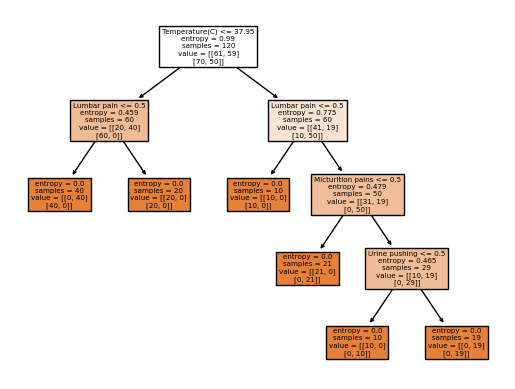

In [18]:
tree.plot_tree(diag_m,feature_names=['Temperature(C)','Nausea','Lumbar pain','Urine pushing',
                                            'Micturition pains','Burning/Itching/Swelling of Bladder'],
              class_names=['Inflammation of bladder','Nephritis'],filled=True)

<font color="blue">With Train and Test dataset</font>

In [19]:
# splitting the data set in 70:30 ratio of train:test
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=100)

In [20]:
diagnosis_dt = DecisionTreeClassifier(criterion="entropy")

In [21]:
diagnosis_model = diagnosis_dt.fit(x_train,y_train)

In [22]:
y_predict = diagnosis_model.predict(x_test)

In [23]:
print(f'Model Score: {accuracy_score(y_test,y_predict)}')

Model Score: 1.0


[Text(0.4, 0.9, 'Temperature(C) <= 37.95\nentropy = 0.997\nsamples = 84\nvalue = [[43, 41]\n[46, 38]]'),
 Text(0.2, 0.7, 'Lumbar pain <= 0.5\nentropy = 0.455\nsamples = 40\nvalue = [[13, 27]\n[40, 0]]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 27\nvalue = [[0, 27]\n[27, 0]]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 13\nvalue = [[13, 0]\n[13, 0]]'),
 Text(0.6, 0.7, 'Lumbar pain <= 0.5\nentropy = 0.739\nsamples = 44\nvalue = [[30, 14]\n[6, 38]]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [[6, 0]\n[6, 0]]'),
 Text(0.7, 0.5, 'Micturition pains <= 0.5\nentropy = 0.475\nsamples = 38\nvalue = [[24, 14]\n[0, 38]]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [[17, 0]\n[0, 17]]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\nentropy = 0.459\nsamples = 21\nvalue = [[7, 14]\n[0, 21]]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 7\nvalue = [[7, 0]\n[0, 7]]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 14\nvalue = [[0, 14]\n[0, 14]]')]

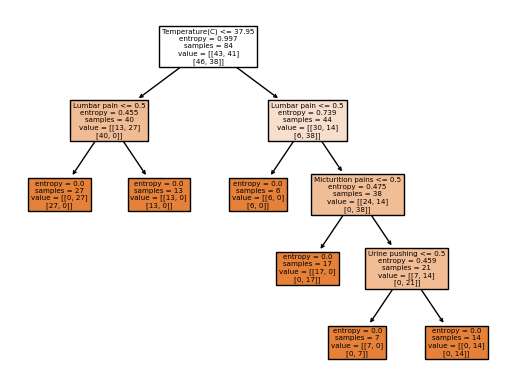

In [24]:
tree.plot_tree(diagnosis_model,feature_names=['Temperature(C)','Nausea','Lumbar pain','Urine pushing',
                                            'Micturition pains','Burning/Itching/Swelling of Bladder'],
              class_names=['Inflammation of bladder','Nephritis'],filled=True)

### (c) Convert the decision rules

In [25]:
def tree_to_decision_rules(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
            print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

In [26]:
tree_to_decision_rules(diagnosis_model,['Temperature(C)','Nausea','Lumbar pain','Urine pushing',
                                            'Micturition pains','Burning/Itching/Swelling of Bladder'])

 if ( Temperature(C) <= 37.95000076293945 ) {
   if ( Lumbar pain <= 0.5 ) {
     return [[ 0. 27.]
 [27.  0.]]
   } else {
     return [[13.  0.]
 [13.  0.]]
   }
 } else {
   if ( Lumbar pain <= 0.5 ) {
     return [[6. 0.]
 [6. 0.]]
   } else {
     if ( Micturition pains <= 0.5 ) {
       return [[17.  0.]
 [ 0. 17.]]
     } else {
       if ( Urine pushing <= 0.5 ) {
         return [[7. 0.]
 [0. 7.]]
       } else {
         return [[ 0. 14.]
 [ 0. 14.]]
       }
     }
   }
 }


### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decisionrules with high interpretability.

<font color="blue">With the entire dataset</font>

In [27]:
fpath = diagnosis_model.cost_complexity_pruning_path(x_data, y_data)

In [28]:
falphas = fpath.get('ccp_alphas')

In [29]:
falphas

array([0.        , 0.09979604, 0.18809344, 0.22957396, 0.3725747 ])

In [30]:
param_grid = {
    'ccp_alpha': falphas
}
fgcv = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)
fgcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.09979604, 0.18809344, 0.22957396, 0.3725747 ])})

In [31]:
fgcv.best_score_

1.0

In [32]:
fgcv.best_params_

{'ccp_alpha': 0.0}

In [33]:
fbest_tree = DecisionTreeClassifier(random_state=42,ccp_alpha=fgcv.best_params_.get('ccp_alpha'))
fbest_tree = fbest_tree.fit(x_data,y_data)
fbest_predict = fbest_tree.predict(x_data)
fbest_accuracy = accuracy_score(y_data,fbest_predict)
fbest_error = 1 - fbest_accuracy

In [34]:
print('Pruning Report:')
print('---------------')
print(f'alpha = {fgcv.best_params_["ccp_alpha"]}')
print(f'model_accuracy = {fbest_accuracy}')
print(f'model_error = {fbest_error}')

Pruning Report:
---------------
alpha = 0.0
model_accuracy = 1.0
model_error = 0.0


[Text(0.4, 0.9, 'Temperature(C) <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'Urine pushing <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'Lumbar pain <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'Nausea <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

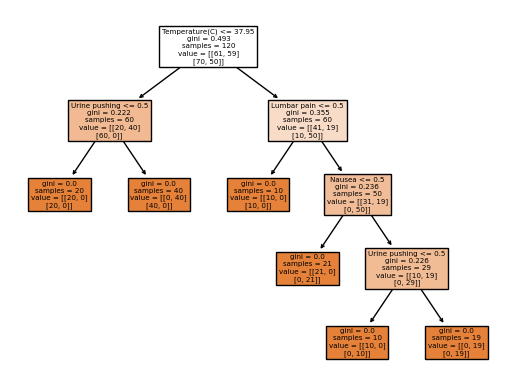

In [35]:
tree.plot_tree(fbest_tree,feature_names=['Temperature(C)','Nausea','Lumbar pain','Urine pushing',
                                            'Micturition pains','Burning/Itching/Swelling of Bladder'],
              class_names=['Inflammation of bladder','Nephritis'],filled=True)

In [36]:
tree_to_decision_rules(fbest_tree,['Temperature(C)','Nausea','Lumbar pain','Urine pushing',
                                            'Micturition pains','Burning/Itching/Swelling of Bladder'])

 if ( Temperature(C) <= 37.95000076293945 ) {
   if ( Urine pushing <= 0.5 ) {
     return [[20.  0.]
 [20.  0.]]
   } else {
     return [[ 0. 40.]
 [40.  0.]]
   }
 } else {
   if ( Lumbar pain <= 0.5 ) {
     return [[10.  0.]
 [10.  0.]]
   } else {
     if ( Nausea <= 0.5 ) {
       return [[21.  0.]
 [ 0. 21.]]
     } else {
       if ( Urine pushing <= 0.5 ) {
         return [[10.  0.]
 [ 0. 10.]]
       } else {
         return [[ 0. 19.]
 [ 0. 19.]]
       }
     }
   }
 }


<font color="red">With data split into training and test data</font>

In [37]:
path = diagnosis_model.cost_complexity_pruning_path(x_train, y_train)

In [38]:
alphas = path.get('ccp_alphas')

In [39]:
alphas

array([0.        , 0.1073785 , 0.17208392, 0.21660384, 0.39307437])

In [40]:
param_grid = {
    'ccp_alpha': alphas
}
gcv = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.1073785 , 0.17208392, 0.21660384, 0.39307437])})

In [41]:
gcv.best_score_

1.0

In [42]:
gcv.best_params_

{'ccp_alpha': 0.0}

In [43]:
best_tree = DecisionTreeClassifier(random_state=42,ccp_alpha=gcv.best_params_.get('ccp_alpha'))
best_tree = best_tree.fit(x_train,y_train)
best_predict = best_tree.predict(x_test)
best_accuracy = accuracy_score(y_test,best_predict)
best_error = 1 - best_accuracy

In [44]:
print('Pruning Report:')
print('---------------')
print(f'alpha = {gcv.best_params_["ccp_alpha"]}')
print(f'model_accuracy = {best_accuracy}')
print(f'model_error = {best_error}')

Pruning Report:
---------------
alpha = 0.0
model_accuracy = 1.0
model_error = 0.0


[Text(0.4, 0.9, 'Temperature(C) <= 37.95\ngini = 0.498\nsamples = 84\nvalue = [[43, 41]\n[46, 38]]'),
 Text(0.2, 0.7, 'Urine pushing <= 0.5\ngini = 0.219\nsamples = 40\nvalue = [[13, 27]\n[40, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [[13, 0]\n[13, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [[0, 27]\n[27, 0]]'),
 Text(0.6, 0.7, 'Lumbar pain <= 0.5\ngini = 0.335\nsamples = 44\nvalue = [[30, 14]\n[6, 38]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [[6, 0]\n[6, 0]]'),
 Text(0.7, 0.5, 'Nausea <= 0.5\ngini = 0.233\nsamples = 38\nvalue = [[24, 14]\n[0, 38]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [[17, 0]\n[0, 17]]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\ngini = 0.222\nsamples = 21\nvalue = [[7, 14]\n[0, 21]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [[7, 0]\n[0, 7]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [[0, 14]\n[0, 14]]')]

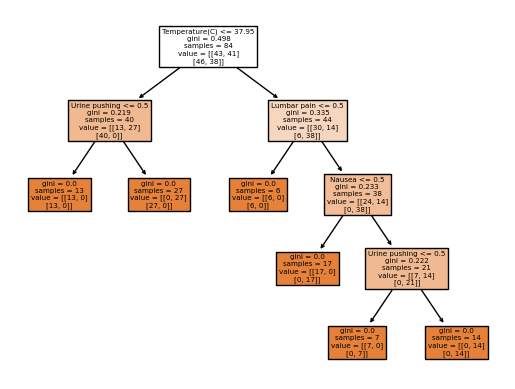

In [45]:
tree.plot_tree(best_tree,feature_names=['Temperature(C)','Nausea','Lumbar pain','Urine pushing',
                                            'Micturition pains','Burning/Itching/Swelling of Bladder'],
              class_names=['Inflammation of bladder','Nephritis'],filled=True)

In [46]:
tree_to_decision_rules(best_tree,['Temperature(C)','Nausea','Lumbar pain','Urine pushing',
                                            'Micturition pains','Burning/Itching/Swelling of Bladder'])

 if ( Temperature(C) <= 37.95000076293945 ) {
   if ( Urine pushing <= 0.5 ) {
     return [[13.  0.]
 [13.  0.]]
   } else {
     return [[ 0. 27.]
 [27.  0.]]
   }
 } else {
   if ( Lumbar pain <= 0.5 ) {
     return [[6. 0.]
 [6. 0.]]
   } else {
     if ( Nausea <= 0.5 ) {
       return [[17.  0.]
 [ 0. 17.]]
     } else {
       if ( Urine pushing <= 0.5 ) {
         return [[7. 0.]
 [0. 7.]]
       } else {
         return [[ 0. 14.]
 [ 0. 14.]]
       }
     }
   }
 }


# Citations:
1. https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
2. https://www.datacamp.com/tutorial/decision-tree-classification-python
3. https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
4. https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
5. https://vzhang1999.medium.com/classification-tree-growing-and-pruning-with-python-code-grid-search-cost-complexity-function-b2e45e33a1a4
6. http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
7. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
8. https://machinelearningmastery.com/lasso-regression-with-python/
9. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html